# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

Comment your solutions!

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [100]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [101]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

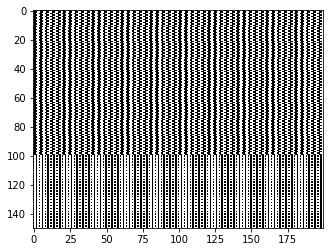

In [102]:
shape = (150,200) #Defineixo les dimensions de la meva imatge
img = np.ndarray(shape, dtype=np.uint8) #Creo la matriu amb les dimensions definides i el tipus de valor (enters de 8 bits)
#La mostro
plt.imshow(img, cmap='gray')
plt.show()

How many values can each pixel have in this case? 

_Un píxel d'aquesta imatge pot agafar valors desde 0 fins a 255._

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

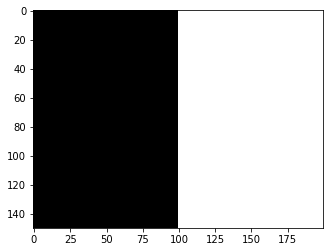

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255]


In [103]:
img[:, 0:100] = 0 #Els pixels de les columnes de 0 a 100 de color negre
img[:, 100:200] = 255 #Els pixels de les columnes 100 fins 200 de color blanc
#Mostro l'imatge
plt.imshow(img, cmap='gray')
plt.show()
#Mostro la primera fila
print(img[0,:])

_Aquí puc veure els valors incials a 0 (que per tan, pertanyen a la primera meitat de la imatge) i de l'altre meitat en endevant el valor passa a ser 255 (blanc)_

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [104]:
io.imsave('images/save_image.jpeg',img)

b) Load the saved image and visualize it:

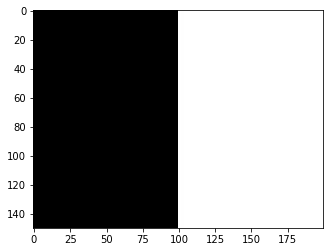

In [105]:
image_llegida = io.imread('images/save_image.jpeg')
plt.imshow(image_llegida, cmap='gray')
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation. Comment your solution.

In [106]:
lenna = io.imread('images/lenna.jpg')
print("Les dimensions de la imatge Lenna son", lenna.shape)

Les dimensions de la imatge Lenna son (225, 400, 3)


b) Convert the previous image to grayscale, visualize it and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values. Comment your solution.

Propietats de Lenna RGB: Shape: (225, 400, 3) Dtype: uint8 Max: 255 Min: 0
Propietats de Lenna Grayscale: Shape: (225, 400) Dtype: float64 Max: 0.98699372549 Min: 0.0014137254902


C:\Users\blair\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


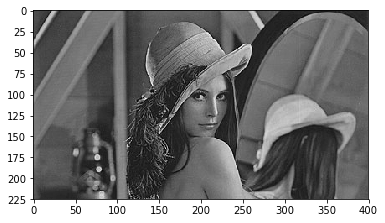

In [107]:
from skimage import color
lenna_grayscale = color.rgb2gray(lenna) #Funció que em converteix una imatge RGB a escala de grisos
io.imsave('images/lenna_grayscale.jpeg',lenna_grayscale) #La guardo al directori d'imatges
print("Propietats de Lenna RGB:", "Shape:",lenna.shape, "Dtype:", lenna.dtype, "Max:",lenna.max(), "Min:",lenna.min())
print("Propietats de Lenna Grayscale:", "Shape:",lenna_grayscale.shape, "Dtype:", lenna_grayscale.dtype, 
      "Max:",lenna_grayscale.max(), "Min:",lenna_grayscale.min())
#La mostro
plt.imshow(lenna_grayscale, cmap='gray')
plt.show()

_Podem veure com Lenna RGB te 3 canals, està formada per enters de 8 bits i cada píxel pot prendre valors de 0 fins 255.
En canvi, Lenna Grayscale, al ser en escala de grisos, està formada per flotants de 64 bits i que aquets estàn compresos entre 0 i 1 (blanc / negre). A part, és clar, només té dos canals_

c) Convert the 'lenna.jpg' image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row. Comment your solution.

C:\Users\blair\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255
 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

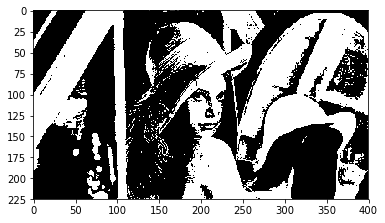

In [108]:
from skimage import img_as_ubyte

#Creo una nova imatge que em posarà True o False per cada píxel de lenna si aquest es superior a 100
lenna_byte = img_as_ubyte(lenna_grayscale) > 100
lenna_int = img_as_ubyte(lenna_byte) #Amb aquest mètode, converteixo cada False a 0 i cada True a 1
#Imprimeixo la fila 10
print(lenna_int[10,:])
print("El rang de valors de l'imatge és de: ",lenna_int.max(),"de màxim i",lenna_int.min(),"de mínim")
#Mostro la imatge
plt.imshow(lenna_int, cmap='gray')
plt.show()


d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Add the corresponding titles of the images when visualizing them. Comment your solution.

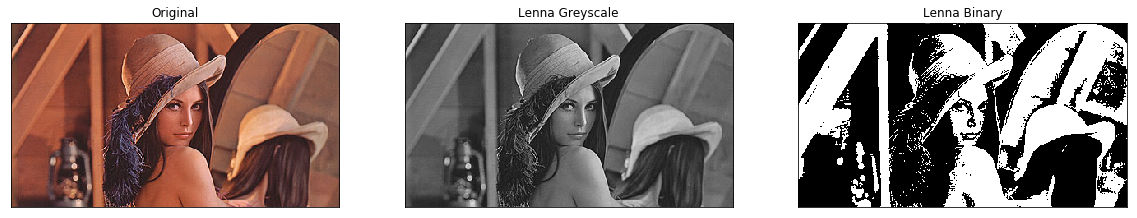

In [109]:
f, axarr = plt.subplots(1,3) #Creo una figura d'una fila i 3 columnes
f.set_size_inches(20,20) #Estableixo la mida de cada subplot
#Defineixo per cada posició quina imatge mostrar, el seu títol i li trec els eixos
axarr[0].imshow(lenna)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)
axarr[1].imshow(lenna_grayscale,cmap='gray')
axarr[1].set_title('Lenna Greyscale')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)
axarr[2].imshow(lenna_int, cmap='gray')
axarr[2].set_title('Lenna Binary')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)
plt.show()

_Puc veure com el detall de la imatge es va esvaïnt per cada operació que aplico. És a dir, amb escala de grisos (el mal-anomenat blanc i negre) puc veure més o menys el mateix detall però perdo color, i al fer-la binaria, passo a tenir exclusivament blanc i negre, perdent detall quan més contrast hi ha_

### 1.4 Images manipulation

a) Create a black mask with width 1/10th of the height of the original image `lenna.jpg` and display it. To do it, create a bigger black image and embed the original one. Comment your solution.

(225, 400, 3)


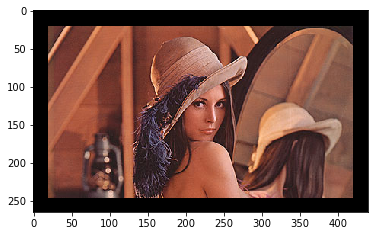

In [110]:
shape = (265,440,3) #Defineixo les mesures de la imate-marc
mark_black = np.ndarray(shape, dtype=np.uint8) #Creo el marc
mark_black[:] = 0 #El faig negre

print(lenna.shape)

#Recorro la matriu per fila, columna i canal
for i in range(np.shape(mark_black)[0]):
    if i >= 21 and i <= 245: 
        for j in range(np.shape(mark_black)[1]):
            if j >= 20 and j <= 419:
                for x in range(np.shape(mark_black)[2]):
                    mark_black[i,j,x] = lenna[i-21,j-20,x]
plt.imshow(mark_black, cmap='gray')
plt.show()

b) Change the mask of the framed image to red. Visualize the three images with their respective titles. Comment your solution.

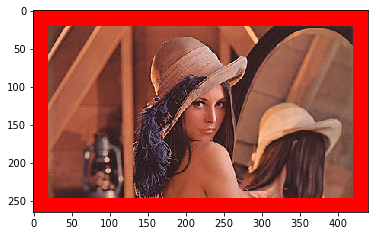

In [111]:
shape = (265,440,3)
mark_red = np.ndarray(shape, dtype=np.uint8)
mark_red[:] = [255,0,0] #Mateix codi d'abans, simplement canvio el color del marc a vermell [Red, Green, Blue]


for i in range(np.shape(mark_red)[0]):
    if i >= 21 and i <= 245:
        for j in range(np.shape(mark_red)[1]):
            if j >= 20 and j <= 419:
                for x in range(np.shape(mark_red)[2]):
                    mark_red[i,j,x] = lenna[i-21,j-20,x]

plt.imshow(mark_red, cmap='gray')
plt.show()

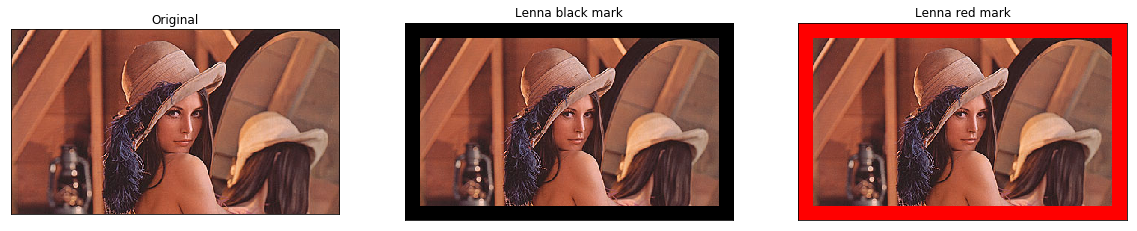

In [112]:
f, axarr = plt.subplots(1,3) #Creo una figura d'una fila i 3 columnes
f.set_size_inches(20,20) #Estableixo la mida de cada subplot
#Defineixo per cada posició quina imatge mostrar, el seu títol i li trec els eixos
axarr[0].imshow(lenna)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)
axarr[1].imshow(mark_black,cmap='gray')
axarr[1].set_title('Lenna black mark')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)
axarr[2].imshow(mark_red, cmap='gray')
axarr[2].set_title('Lenna red mark')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)
plt.show()

_Puc veure Lenna contrastada en un marc negre i vermell de 1/10 la seva altura original_

### 1.5 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

63 193


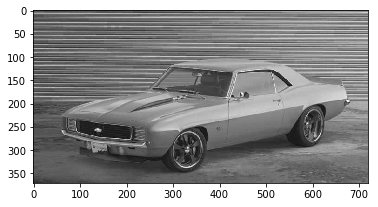

In [113]:
car_lowContrast = io.imread('images/car_lowContrast.jpg') #Carrego la imatge
print(car_lowContrast.min(), car_lowContrast.max()) #Mostro els seus valors mínim i màxim
#Mostro la imatge
plt.imshow(car_lowContrast, cmap='gray')
plt.show()

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

Valor min/max de l'imatge original:  63 193
Valor min/max de l'imatge tractada:  0 130


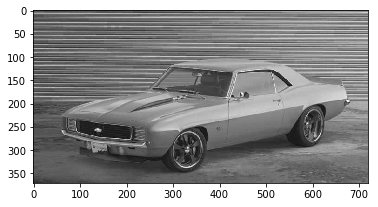

In [114]:
from skimage import exposure

print("Valor min/max de l'imatge original: ",car_lowContrast.min(), car_lowContrast.max()) #Mostro els seus valors mínim i màxim
dif = car_lowContrast.max() - car_lowContrast.min() #Trobo la diferència
dark_image = exposure.rescale_intensity(car_lowContrast, out_range=(0,dif)) #Aplico el contrast. Out_range perquè és sortida
print("Valor min/max de l'imatge tractada: ",dark_image.min(), dark_image.max()) #Els min i màx de la nova imatge
#La mostro
plt.imshow(dark_image, cmap='gray')
plt.show()

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

Valor min/max de l'imatge original:  63 193
Valor min/max de l'imatge tractada:  125 255


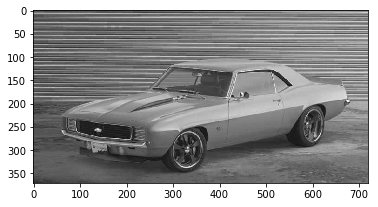

In [115]:
print("Valor min/max de l'imatge original: ",car_lowContrast.min(), car_lowContrast.max())
#Amb la diferència calculada abans, deixo el mínim intacte i estableixo el màxim a 255
bright_im = exposure.rescale_intensity(car_lowContrast, out_range=(255 - dif,255))
print("Valor min/max de l'imatge tractada: ",bright_im.min(), bright_im.max())
plt.imshow(bright_im, cmap='gray')
plt.show()

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through a scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one.

Valor min/max de l'imatge original:  63 193
Valor min/max de l'imatge tractada:  0 254


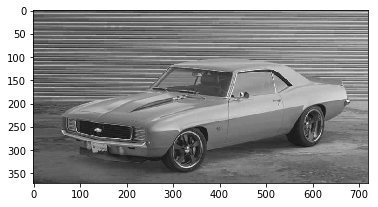

In [116]:
#Per Manipulació directe

print("Valor min/max de l'imatge original: ",car_lowContrast.min(), car_lowContrast.max())
#Calculo l'escalat per la dreta. Li resto la meitat de 255
right = (float(255) - 127) / (car_lowContrast.max() - 127)
#Ara per l'esquerre
left = float(127) / car_lowContrast.min()
#Recorro la matriu per files i columnes
for i in range(np.shape(car_lowContrast)[0]):
        for j in range(np.shape(car_lowContrast)[1]):
            #Si em trobo un valor més petit que aquest contrast
            if car_lowContrast[i][j] < 128:
                #Li aplico el tractat esquerre. Resto 63 per posar un 0
                car_lowContrast[i][j] = (car_lowContrast[i][j] - 63) * left 
            else:
                car_lowContrast[i][j] = (((car_lowContrast[i][j] - 128) * right) + 128) #Si no, el dret
                
print("Valor min/max de l'imatge tractada: ",car_lowContrast.min(), car_lowContrast.max())
#Mostro l'imatge
plt.imshow(car_lowContrast, cmap='gray')
plt.show()

Valor min/max de l'imatge original:  0 254
Valor min/max de l'imatge tractada:  0.000954627133872 255.0


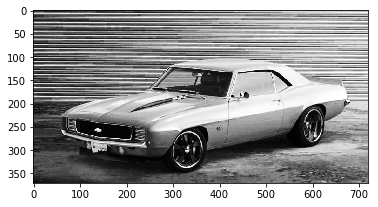

In [117]:
#Per comanda

print("Valor min/max de l'imatge original: ",car_lowContrast.min(), car_lowContrast.max())
#Mètode que permet retocar l'histograma de l'imatge. El multiplico pel seu màxim valor obtenint un contràst màxim.
car_highContrast = exposure.equalize_hist(car_lowContrast) * 255
#Ho podem veure al imprimir els seus valors:
print("Valor min/max de l'imatge tractada: ",car_highContrast.min(), car_highContrast.max())
plt.imshow(car_highContrast, cmap='gray')
plt.show()

e) Visualize the 5 images in the same figure, each one with its corresponding title.

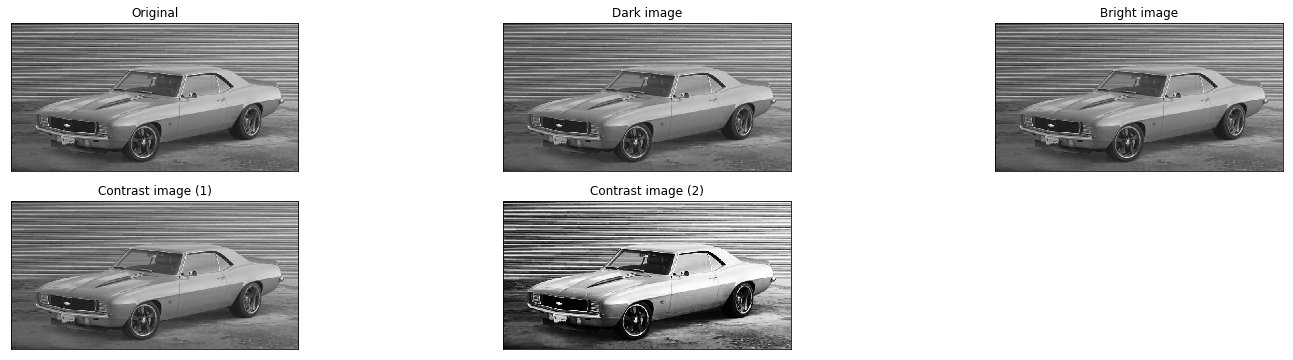

In [118]:
f, axarr = plt.subplots(2,3)
f.set_size_inches(25,6)

original = io.imread('images/car_lowContrast.jpg')
axarr[0][0].imshow(original,'gray')
axarr[0][0].set_title('Original')
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)

axarr[0][1].imshow(dark_image,cmap='gray')
axarr[0][1].set_title('Dark image')
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)

axarr[0][2].imshow(bright_im, cmap='gray')
axarr[0][2].set_title('Bright image')
axarr[0][2].xaxis.set_visible(False)
axarr[0][2].yaxis.set_visible(False)

axarr[1][0].imshow(car_lowContrast, cmap='gray')
axarr[1][0].set_title('Contrast image (1)')
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)

axarr[1][1].imshow(car_highContrast, cmap='gray')
axarr[1][1].set_title('Contrast image (2)')
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)

f.delaxes(axarr[1][2])

plt.show()

### 1.6 Masks and logical image manipulation

Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

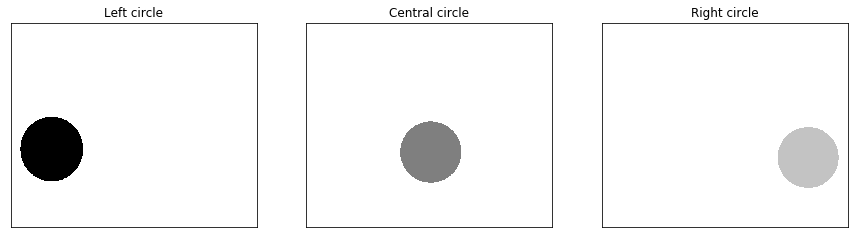

In [119]:
from skimage.color import rgb2gray

circles = io.imread('images/circles.bmp') #Lleigeixo l'imatge
circles_gray = rgb2gray(circles) #La converteixo a escala de grisos per poder operar bé

color = np.unique(circles_gray) #Mètode que retorna tots els colors presents a l'imatge. En aquest cas, 4
#print(color)

#"Python" necesita entendre amb quin tipus d'imatge està tractant
first_circle = circles_gray.copy()
second_circle = circles_gray.copy()
third_circle = circles_gray.copy()

#Estableixo una imatge que té a 1 tots els píxels de l'imatge original diferents de zero, ja que color[0] és 0
first_circle[circles_gray!=color[0]] = 1 
#Estableixo una imatge que té a 1 tots els píxels de l'imatge original diferents de 0.49803922, ja que color[1] és 0.49803922
second_circle[circles_gray!=color[1]] = 1
#Estableixo una imatge que té a 1 tots els píxels de l'imatge original diferents de 0.76470588, ja que color[2] és 0.76470588
third_circle[circles_gray!=color[2]] = 1

#Les mostro!
f, axarr = plt.subplots(1,3)
f.set_size_inches(15,15)

axarr[0].imshow(first_circle, cmap='gray', vmin = 0, vmax = 1)
axarr[0].set_title('Left circle')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(second_circle, cmap='gray', vmin = 0, vmax = 1)
axarr[1].set_title('Central circle')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(third_circle, cmap='gray', vmin = 0, vmax = 1)
axarr[2].set_title('Right circle')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

### 1.7 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

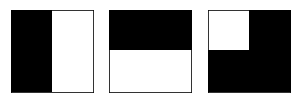

In [120]:
#Imatge 1
img1 = np.zeros((100,100), dtype='uint8') #La creo amb zeros (negre)
img1[:,50:] = 1 #Estableixo la meitat de les columnes a negre

img2 = np.zeros((100,100), dtype='uint8')
img2[50:,:] = 1 #Ara per files

img3 = np.zeros((100,100), dtype='uint8')
img3[:50,:50] = 1 #Estableixo a blanc les primeres 50 files (:50,) i les primeres 50 columnes (:50)


#Les dibuixo
f, axarr = plt.subplots(1,3)
f.set_size_inches(5,5)

axarr[0].imshow(img1, cmap='gray', vmin = 0, vmax = 1)
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(img2, cmap='gray', vmin = 0, vmax = 1)
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(img3, cmap='gray', vmin = 0, vmax = 1)
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

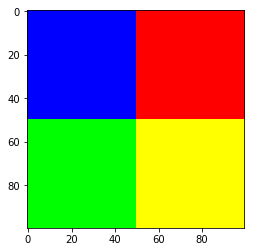

In [121]:
#Creo una quarta imatge blanca, de la mateixa dimensió que les anteriors. Aquesta és RGB.
img4 = np.zeros((100,100,3),dtype='uint8')

#Primer vem optar per fer ús de list comprehension i vam programar algo aixi:
#img4[img1==1]+=(255,0,0)
#img4[img2==1]+=(0,255,0)
#img4[img3==1]+=(0,0,255)

#A python 2.7 ens funcionava, però a 3 no, perque hi havia un problema amb el casting d'enters de 8 bits a 32 que no hem sapigut
#solucionar. Vam probar de fer servir el mètode .add, però tampoc.
#Finalment, hem optat per recorre "manualment" tota la matriu


for i in range(np.shape(img4)[0]):
    for j in range(np.shape(img4)[1]):
        if img1[i][j] == 1:
            img4[i][j] = (255,0,0) + img4[i][j]
        if img2[i][j] == 1:
            img4[i][j] = (0,255,0) + img4[i][j]
        if img3[i][j] == 1:
            img4[i][j] = (0,0,255) + img4[i][j]
#Mostro l'imatge
plt.imshow(img4, cmap='gray', vmin = 0, vmax = 1)
plt.show()

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

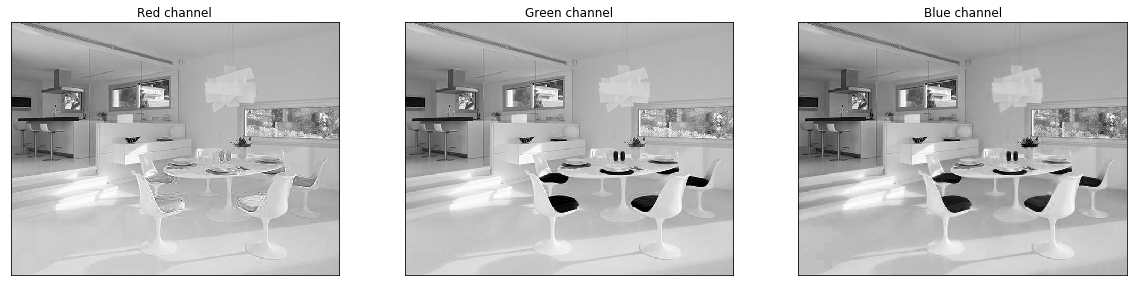

In [122]:
sillas = io.imread('images/sillas.jpg')

shape = sillas.shape

sillas_red = np.zeros(shape,dtype='uint8') #Creo una matriu de zeros

#Per cada fila i columna,
for i in range(np.shape(sillas)[0]):
        for j in range(np.shape(sillas)[1]):
            #Hi vaig posant els mateixos valors vermells que la imatge originals. La resta els deixo igual
            sillas_red[i][j] = (sillas[i][j][0],0,0) 
sillas_red = rgb2gray(sillas_red)

#El mateix, pero amb els valors verds
sillas_green = np.zeros(shape,dtype='uint8')
for i in range(np.shape(sillas)[0]):
        for j in range(np.shape(sillas)[1]):
            sillas_green[i][j] = (0,sillas[i][j][1],0) 
sillas_green = rgb2gray(sillas_green)

#El mateix, pero amb els valors blaus
sillas_blue = np.zeros(shape,dtype='uint8')
for i in range(np.shape(sillas)[0]):
        for j in range(np.shape(sillas)[1]):
            sillas_blue[i][j] = (0,0,sillas[i][j][2]) 
sillas_blue = rgb2gray(sillas_blue)

#Mostro el conjunt d'imatges
f, axarr = plt.subplots(1,3)
f.set_size_inches(20,20)

axarr[0].imshow(sillas_red, cmap='gray')
axarr[0].set_title('Red channel')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(sillas_green, cmap='gray')
axarr[1].set_title('Green channel')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(sillas_blue, cmap='gray')
axarr[2].set_title('Blue channel')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

d) Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/ex17c3.png">

C:\Users\blair\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
C:\Users\blair\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


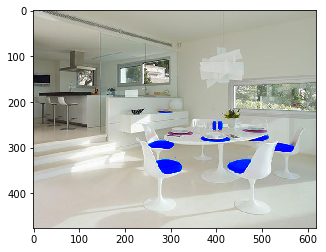

In [123]:
sillas = io.imread('images/sillas.jpg')

#Recorro l'imatge per files i columnes
for i in range(np.shape(sillas)[0]):
        for j in range(np.shape(sillas)[1]):
            
            a = sillas[i][j][0] - sillas[i][j][1] #Comparo els vermells de la imatge amb els verds. Ho guardo en a
            b = sillas[i][j][0] - sillas[i][j][2]#Comparo els vermells de la imatge amb els blaus. Ho guardo en b
            #Mentre el vermell guanyi als altres colors
            #(40 es el numero mes aducuat perque respecti els colors originals de l'imatge.)
            if sillas[i][j][0] > sillas[i][j][1] and sillas[i][j][0] > sillas[i][j][2] and a > 40 and b > 40:
                #Aquelles posicions (pixels) que hagin "guanyat" els torno blaus
                sillas[i][j] =  (0,sillas[i][j][1],255)
#Mostro l'imatge
plt.imshow(sillas, cmap='gray', vmin = 0, vmax = 1)
plt.show()

e) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

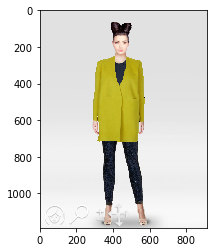

In [124]:
coat = io.imread('images/coat.png')
model = io.imread('images/model.png')
texture = io.imread('images/texture2.png')

#Recorro l'imatge per files i columnes
for i in range(np.shape(model)[0]):
        for j in range(np.shape(model)[1]):
            #Amb aquest if agafo la jaqueta de la imatge, ja que té fons negre (!=0)
            if coat[i][j][0] != 0 and coat[i][j][1] != 0 and coat[i][j][2] != 0:
                #En aquesta part, com que l'imatge de la model te la mateixa mida, "li poso" la jaqueta
                model[i][j] =  coat[i][j]
#Mostro l'imatge
plt.imshow(model, cmap='gray', vmin = 0, vmax = 1)
plt.show()

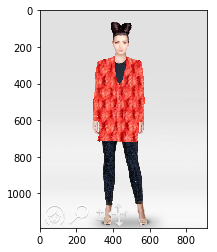

In [125]:
coat = io.imread('images/coat.png')
model = io.imread('images/model.png')
texture = io.imread('images/texture2.png')

#Recorro l'imatge per files i columnes
for i in range(np.shape(model)[0]):
        for j in range(np.shape(model)[1]):
            #Amb aquest if agafo la jaqueta de la imatge, ja que té fons negre (!=0)
            if coat[i][j][0] != 0 and coat[i][j][1] != 0 and coat[i][j][2] != 0:
                for x in range(3): #Per cada canal de colors (RGB)
                    model[i][j][x] =  texture[i][j][x] #Li aplico els canals de la textura
#Mostro l'imatge
plt.imshow(model, cmap='gray', vmin = 0, vmax = 1)
plt.show()

## Delivery

Compress your file named **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used (if any) that are not provided in P1.zip.

**Deadline (only through Campus Virtual): October 3, 11:00 p.m.** 